In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../datasets/train.csv")
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
df.isna().sum()[df.isna().sum() > 0]

fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [9]:
df.id.nunique(), df.shape

(188533, (188533, 13))

In [10]:
df.brand.nunique(), df.brand.value_counts()

(57,
 brand
 Ford             23088
 Mercedes-Benz    19172
 BMW              17028
 Chevrolet        16335
 Audi             10887
 Porsche          10612
 Land              9525
 Toyota            8850
 Lexus             8643
 Jeep              6474
 Cadillac          4674
 RAM               4249
 Nissan            3930
 Tesla             3738
 INFINITI          3276
 GMC               3215
 Dodge             3133
 Mazda             2719
 Kia               2497
 Lincoln           2423
 Subaru            2381
 Acura             2282
 Honda             2101
 Hyundai           2045
 Volkswagen        1765
 Jaguar            1319
 Bentley           1155
 MINI              1064
 Genesis            969
 Buick              940
 Maserati           939
 Lamborghini        809
 Chrysler           727
 Volvo              723
 Alfa               682
 Rivian             590
 Rolls-Royce        561
 Mitsubishi         551
 Pontiac            538
 Hummer             520
 Ferrari            359
 McL

In [11]:
df.model.nunique(), df.model.value_counts()

(1897,
 model
 F-150 XLT                        2945
 M3 Base                          2229
 Camaro 2SS                       1709
 M4 Base                          1622
 Mustang GT Premium               1526
                                  ... 
 ForTwo Pure                         2
 XLR Base                            1
 X5 3.0i                             1
 X5 xDrive40e                        1
 Integra w/A-Spec Tech Package       1
 Name: count, Length: 1897, dtype: int64)

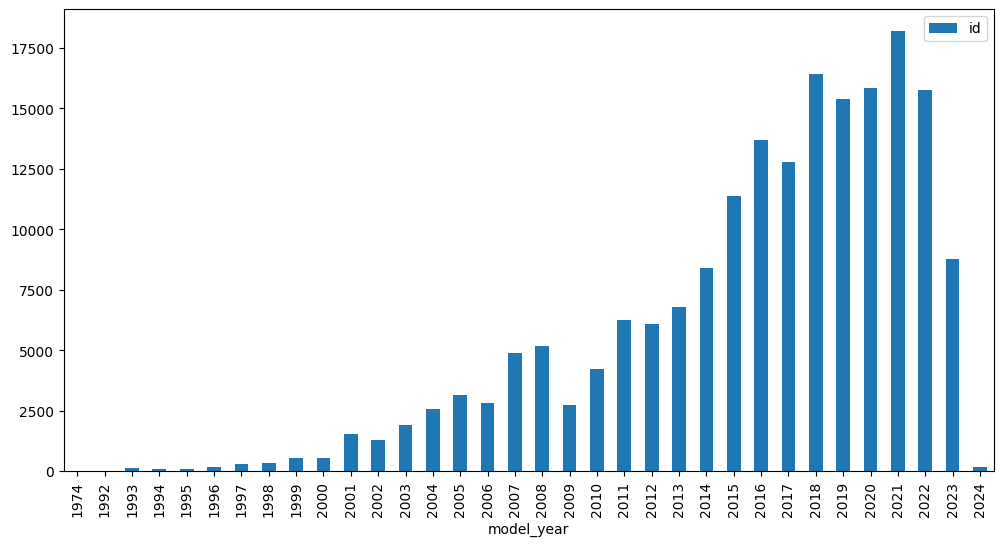

In [12]:
pd.DataFrame(df.groupby(['model_year']).id.count()).plot(kind='bar', figsize=(12, 6))
plt.show()

<Axes: xlabel='model'>

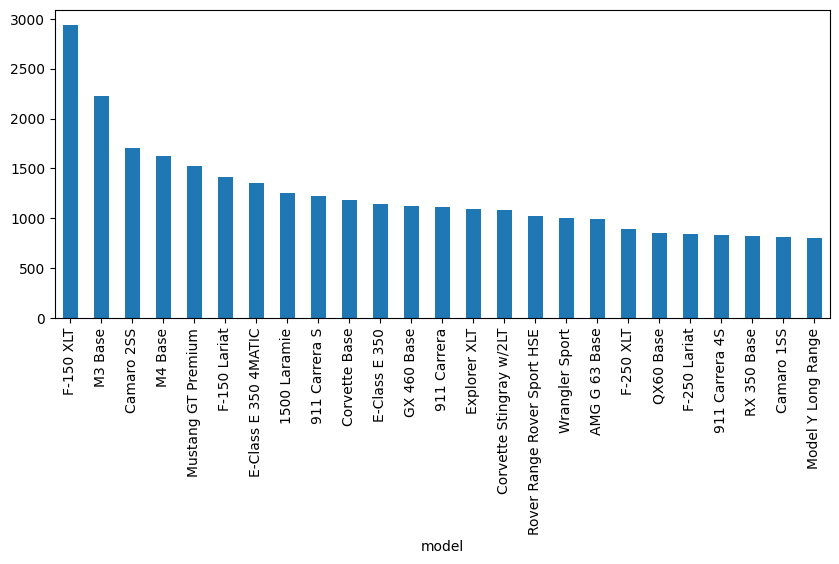

In [13]:
df.model.value_counts()[:25].plot(kind='bar', figsize=(10, 4))

In [14]:
brands = pd.DataFrame(df.groupby(['brand', 'model']).id.count()).reset_index()
brands

,brand,model,id
0,Acura,300 Touring,1
1,Acura,330 i xDrive,1
2,Acura,335 is,1
3,Acura,ATS 2.0L Turbo Luxury,1
4,Acura,Acadia SLE-1,1
...,...,...,...
3550,Volvo,XC90 T6 Inscription,32
3551,Volvo,XC90 T6 Momentum,88
3552,Volvo,i8 Base,1
3553,smart,ForTwo Pure,2


In [15]:
brands.groupby(['brand']).apply(lambda x: x.nlargest(3, 'id')).drop(columns=['brand']).reset_index(level=['brand']).reset_index(drop=True)

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\1839968540.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brands.groupby(['brand']).apply(lambda x: x.nlargest(3, 'id')).drop(columns=['brand']).reset_index(level=['brand']).reset_index(drop=True)


,brand,model,id
0,Acura,MDX 3.7L Advance,190
1,Acura,TLX V6 Advance,139
2,Acura,TLX Type S w/Performance Tire,119
3,Alfa,Romeo Giulia Ti,270
4,Alfa,Romeo Stelvio Ti Sport,170
...,...,...,...
156,Volvo,XC90 T6 Momentum,88
157,Volvo,C70 T5,63
158,Volvo,XC60 T6 Inscription,57
159,smart,ForTwo Pure,2


<Axes: xlabel='brand'>

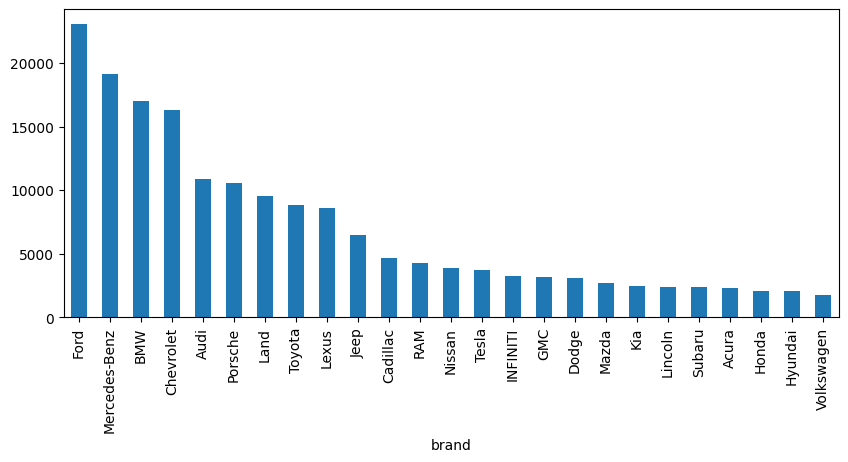

In [16]:
df.brand.value_counts()[:25].plot(kind='bar', figsize=(10, 4))

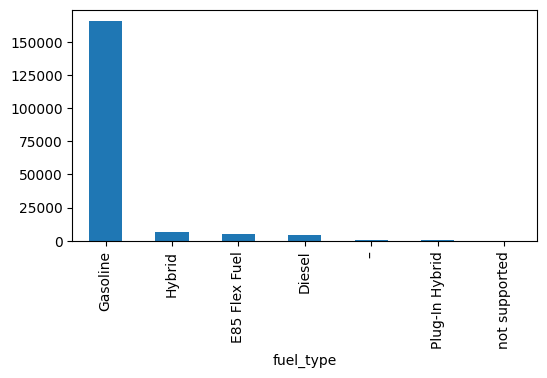

In [17]:
df.fuel_type.value_counts().plot(kind='bar', figsize=(6, 3));

In [18]:
df.accident.value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

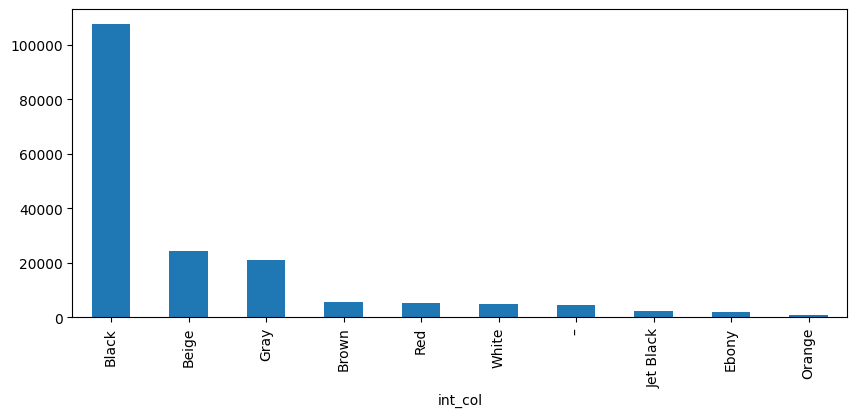

In [19]:
df.int_col.value_counts()[:10].plot(kind='bar', figsize=(10, 4));

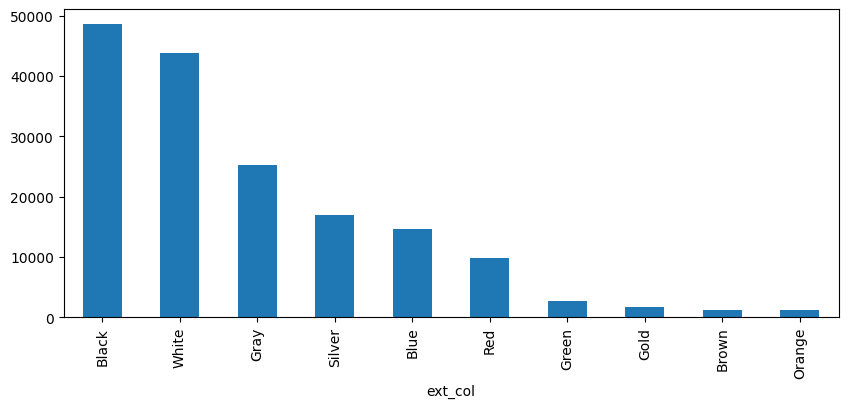

In [20]:
df.ext_col.value_counts()[:10].plot(kind='bar', figsize=(10, 4));

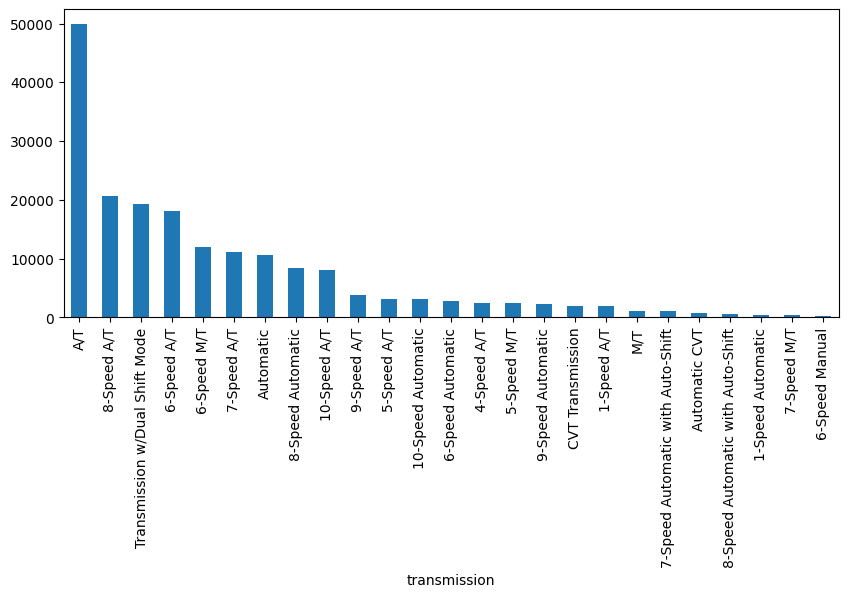

In [21]:
df.transmission.value_counts()[:25].plot(kind='bar', figsize=(10, 4));

<Axes: xlabel='brand'>

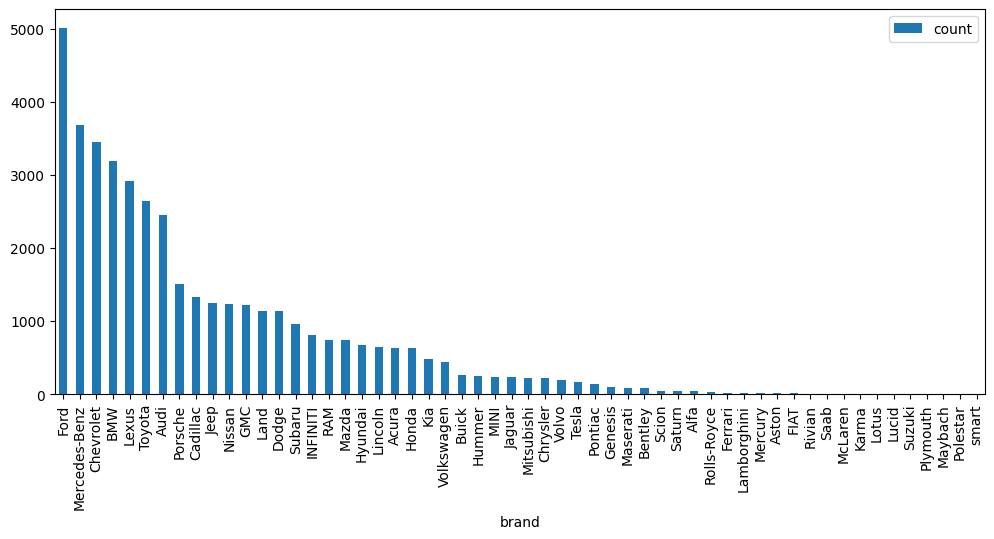

In [22]:
df.loc[df.accident != 'None reported'].groupby(['brand']).accident.value_counts().reset_index().drop(columns=['accident']).set_index('brand').sort_values('count', ascending=False).plot(kind='bar', figsize=(12, 5))

In [23]:
accident = df.loc[df.accident != 'None reported'].groupby(['brand']).id.count().reset_index()
accident.rename(columns={'id': 'accident'}, inplace=True)
accident.head()

,brand,accident
0,Acura,663
1,Alfa,60
2,Aston,16
3,Audi,2547
4,BMW,3399


In [24]:
count = df.groupby(['brand']).accident.count().reset_index()
count.rename(columns={'accident': 'count'}, inplace=True)
count.head()

,brand,count
0,Acura,2259
1,Alfa,665
2,Aston,237
3,Audi,10790
4,BMW,16830


In [25]:
count = count.merge(accident, on='brand')
count['percentage'] = count['accident']*100/count['count']
count.drop(columns=['count', 'accident'], inplace=True)
count.head()

,brand,percentage
0,Acura,29.349270
1,Alfa,9.022556
2,Aston,6.751055
3,Audi,23.605190
4,BMW,20.196078


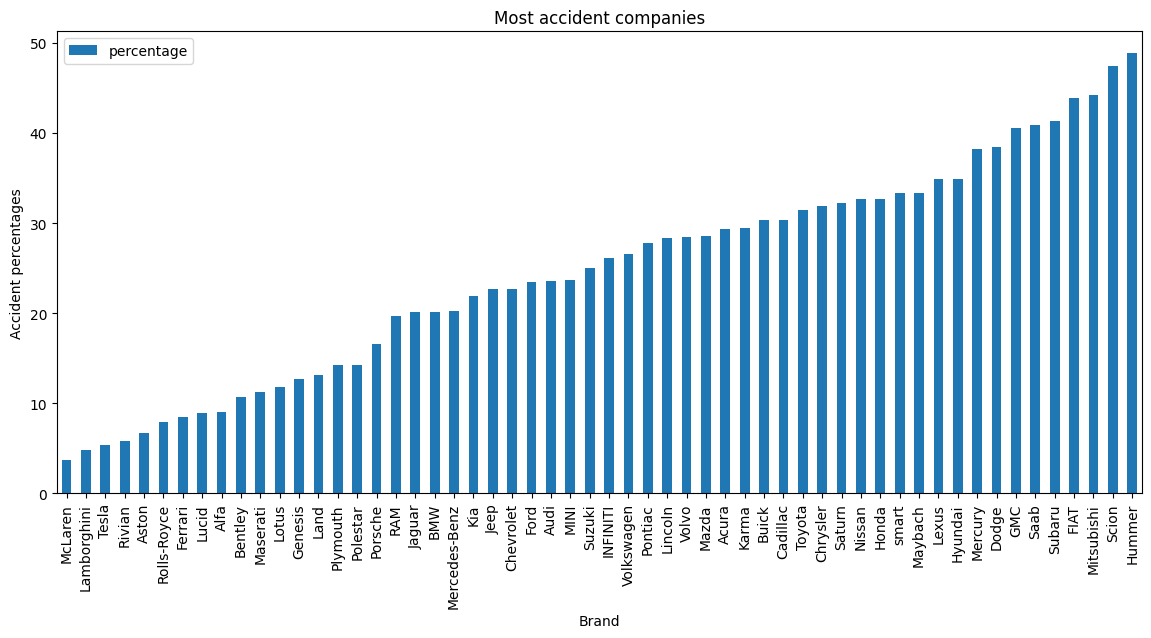

In [26]:
count.set_index('brand').sort_values('percentage').plot(kind='bar', figsize=(14, 6))
plt.title("Most accident companies")
plt.xlabel("Brand")
plt.ylabel("Accident percentages")
plt.show()

In [27]:
no_accident = df.loc[df.accident == 'None reported'].groupby(['brand']).id.count().reset_index()
no_accident.rename(columns={'id': 'no_accident'}, inplace=True)
count = df.groupby(['brand']).accident.count().reset_index()
count.rename(columns={'accident': 'count'}, inplace=True)
count = count.merge(no_accident, on='brand')
count['percentage'] = count['no_accident']*100/count['count']
count.drop(columns=['count', 'no_accident'], inplace=True)

count.head()

,brand,percentage
0,Acura,71.668880
1,Alfa,93.533835
2,Aston,93.670886
3,Audi,77.293791
4,BMW,80.980392


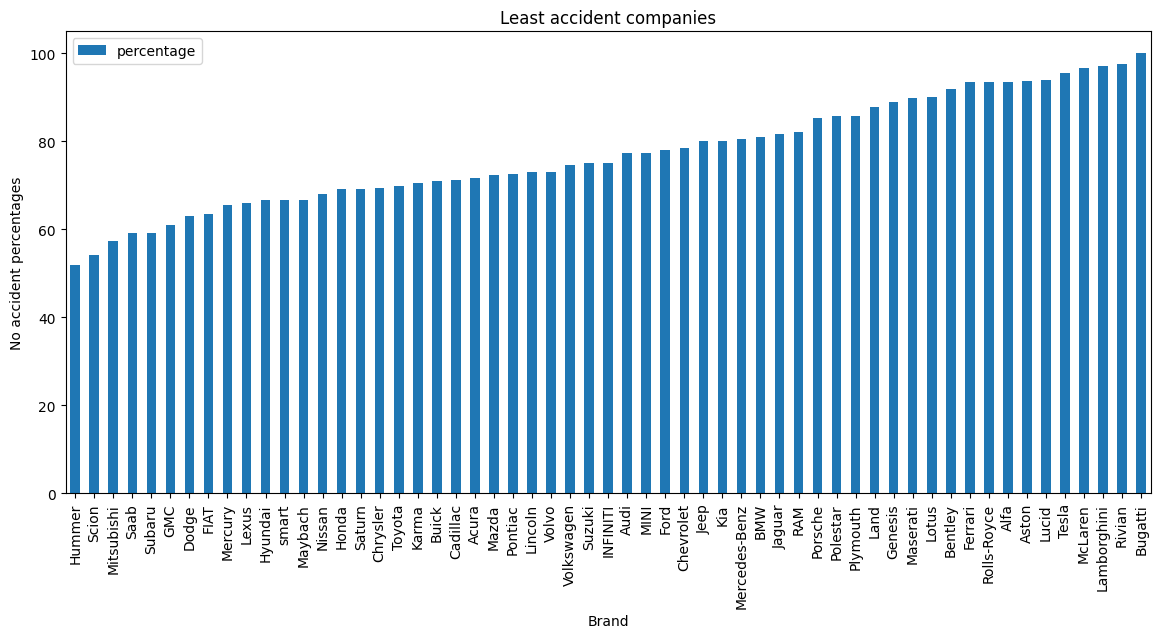

In [28]:
count.set_index('brand').sort_values('percentage').plot(kind='bar', figsize=(14, 6))
plt.title("Least accident companies")
plt.xlabel("Brand")
plt.ylabel("No accident percentages")
plt.show()

In [29]:
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999


C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\252234980.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year_wise_accident = year_wise_accident.groupby(['model_year']).apply(lambda x: x.nlargest(3, 'id')).reset_index(drop=True).set_index(['model_year', 'brand'])


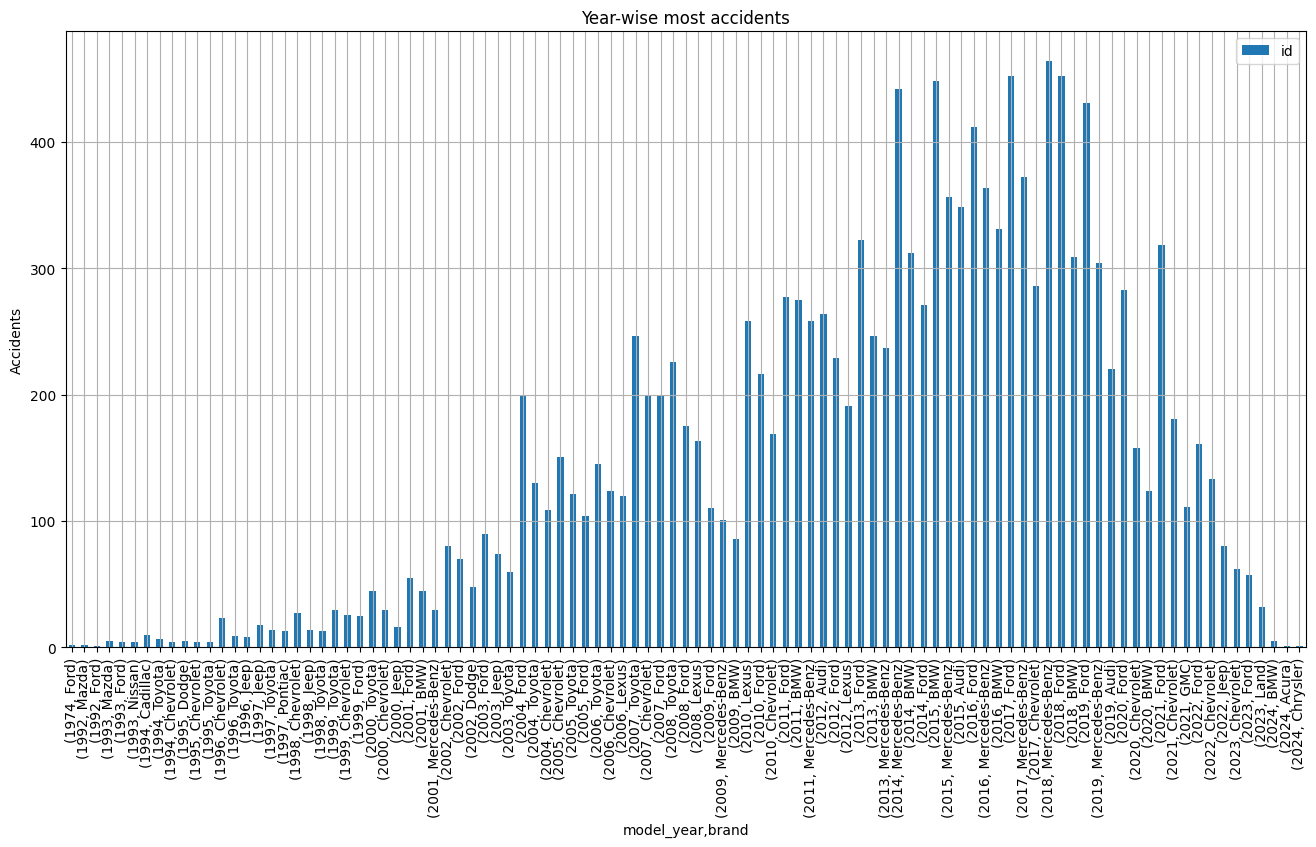

In [30]:
year_wise_accident = df.loc[df.accident != 'None reported'].groupby(['model_year', 'brand']).id.count().reset_index()
year_wise_accident = year_wise_accident.groupby(['model_year']).apply(lambda x: x.nlargest(3, 'id')).reset_index(drop=True).set_index(['model_year', 'brand'])

year_wise_accident.plot(kind='bar', figsize=(16, 8), )
plt.title("Year-wise most accidents")
plt.ylabel("Accidents")
plt.grid()
plt.show()

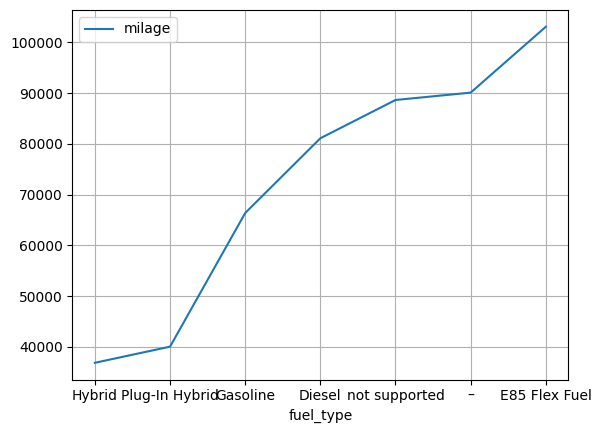

In [31]:
df.groupby(['fuel_type']).milage.mean().reset_index().sort_values('milage').set_index('fuel_type').plot(kind='line',)
plt.grid();

In [32]:
engine_counts = df.engine.value_counts().reset_index()[:25]
engine_counts

,engine,count
0,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
1,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902
2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841
3,2.0L I4 16V GDI DOHC Turbo,2680
4,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451
5,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436
6,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187
7,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138
8,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,2134
9,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,2084


In [33]:
engine_brands = df.groupby(['engine']).brand.unique().reset_index()
engine_brands

,engine,brand
0,1.2L I3 12V GDI DOHC Turbo,"[Chevrolet, Nissan, Buick, Honda, Kia]"
1,1.3L I3 12V GDI DOHC Turbo,"[Buick, Chevrolet, Ford, Lincoln, Tesla, Kia, ..."
2,1.3L I3 12V MPFI DOHC Turbo,"[Buick, Chevrolet]"
3,1.4L I4 16V GDI DOHC Turbo,"[MINI, Volkswagen, Buick, Kia, Chevrolet, Honda]"
4,1.5 Liter Turbo,"[Honda, BMW, Nissan, Acura, Hyundai, Toyota]"
...,...,...
1112,Intercooled Turbo Premium Unleaded I-4 2.0 L/122,"[Ferrari, BMW, Ford, Volkswagen, Nissan, Audi,..."
1113,Standard Range Battery,"[Ford, Chevrolet, GMC, RAM, Tesla]"
1114,V6,"[Land, Mercedes-Benz, Jaguar, Volkswagen, Volvo]"
1115,V8,"[Land, Volkswagen]"


In [34]:
brand_engine_counts = engine_counts.merge(engine_brands, on='engine')
brand_engine_counts['brand_counts'] = brand_engine_counts.brand.apply(lambda x: len(x))
brand_engine_counts

,engine,count,brand,brand_counts
0,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,"[Chevrolet, GMC, Ford, Dodge, Porsche, Toyota,...",20
1,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902,"[BMW, Lincoln, Land, Honda, Maserati, Toyota, ...",32
2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841,"[Cadillac, GMC, Chevrolet, Ford, Genesis, Volk...",15
3,2.0L I4 16V GDI DOHC Turbo,2680,"[BMW, Jeep, Ford, Buick, RAM, Mercedes-Benz, L...",41
4,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451,"[Ford, Genesis, Lincoln, Mercedes-Benz, GMC, P...",11
5,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436,"[Land, Porsche, Audi, Jaguar, Toyota, BMW, Vol...",14
6,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187,"[Chevrolet, Porsche, Aston, GMC, Acura, Volksw...",11
7,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138,"[Chevrolet, Dodge, Ford, Volvo, Lincoln, Ponti...",9
8,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,2134,"[BMW, Toyota, INFINITI, Porsche, Audi, Ford, N...",12
9,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,2084,"[BMW, INFINITI, Land, Mercedes-Benz, Acura, Ch...",12


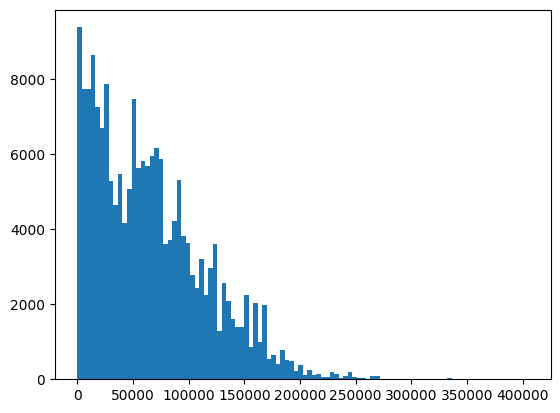

In [35]:
plt.hist(df.milage, bins=100);

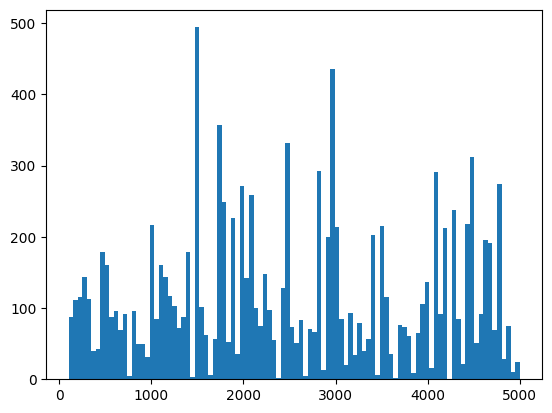

In [36]:
plt.hist(df.loc[df.milage<=5000].milage, bins=100);

<Axes: xlabel='model_year'>

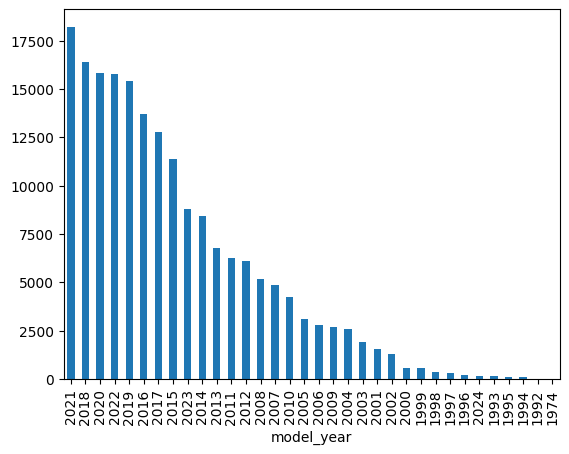

In [37]:
df.model_year.value_counts().plot(kind='bar')

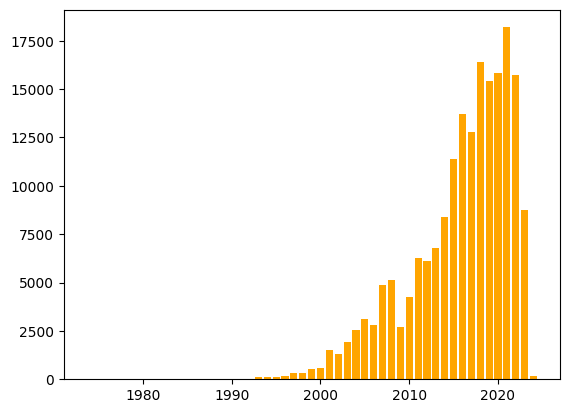

In [38]:
plt.bar(x=list(df.model_year.value_counts().reset_index().model_year), height=list(df.model_year.value_counts().reset_index()['count']), color='orange');

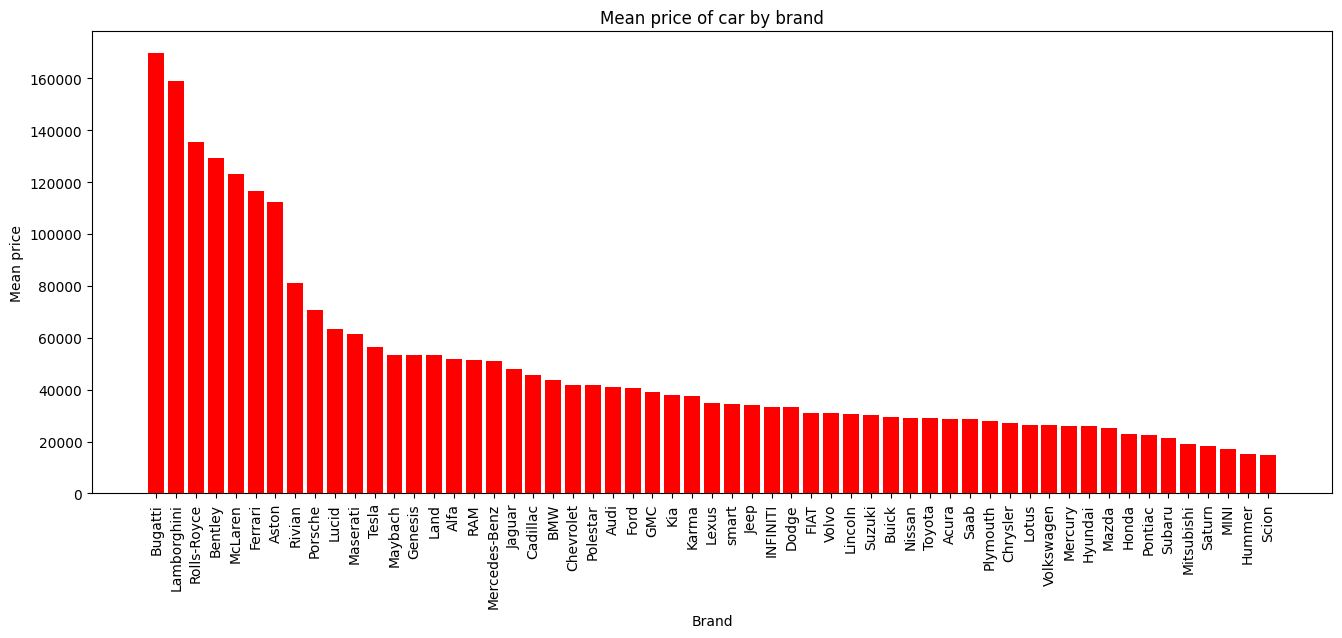

In [39]:
plt.figure(figsize=(16, 6))
plt.bar(x=df.groupby(['brand']).price.mean().reset_index().sort_values('price', ascending=False).brand, height=list(df.groupby(['brand']).price.mean().reset_index().sort_values('price', ascending=False)['price']), color='red')
plt.xticks(rotation=90)
plt.title("Mean price of car by brand")
plt.ylabel("Mean price")
plt.xlabel("Brand")
plt.show()

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\298463034.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(prices['min'], 'o-', color='orange', label='min', ls='--')


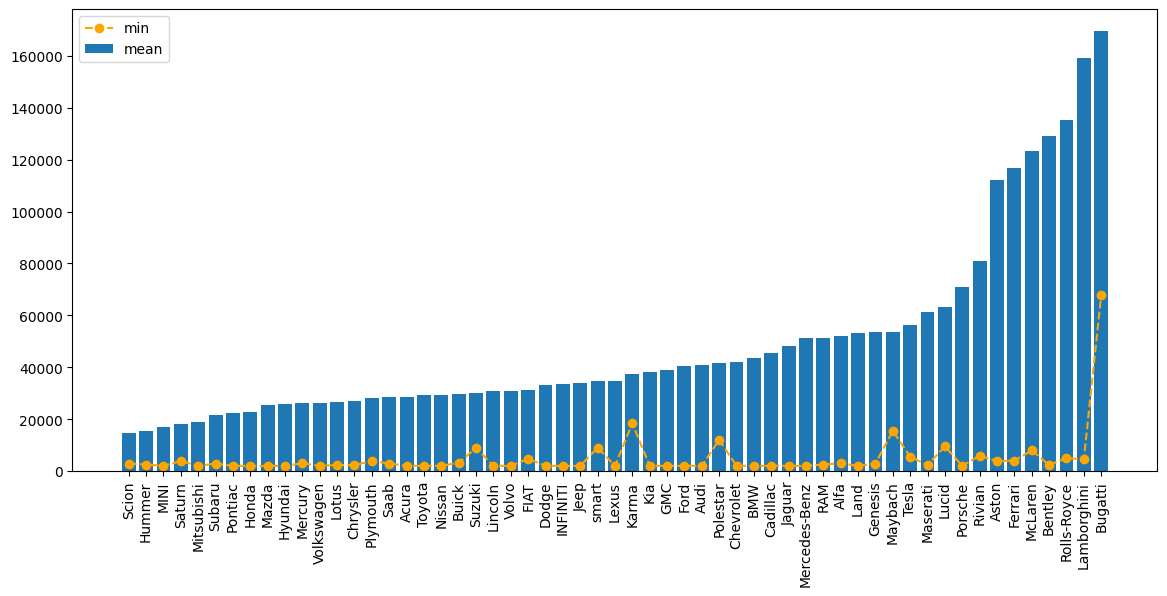

In [40]:
prices = df.groupby(['brand']).price.agg(['min', 'max', 'mean']).sort_values('mean')

plt.figure(figsize=(14, 6))
plt.plot(prices['min'], 'o-', color='orange', label='min', ls='--')
plt.bar(x=prices.index, height=prices['mean'], label='mean')
plt.legend()
plt.xticks(rotation='vertical');

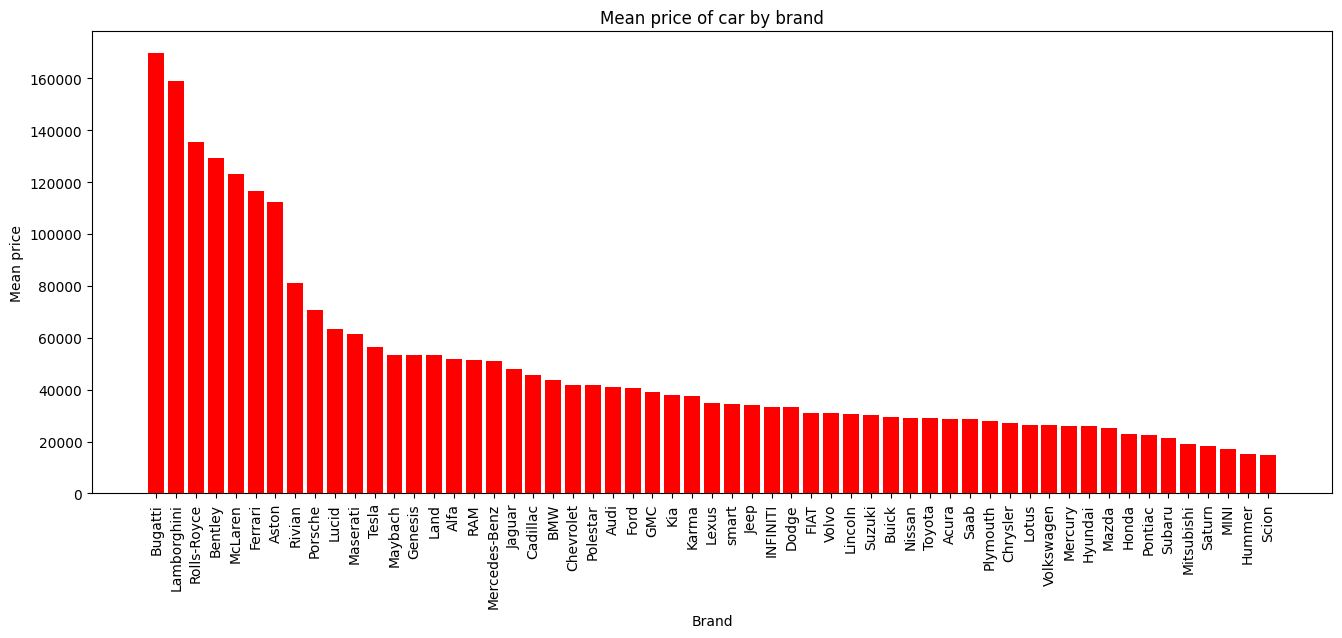

In [41]:
plt.figure(figsize=(16, 6))
plt.bar(x=df.groupby(['brand']).price.mean().reset_index().sort_values('price', ascending=False).brand, height=list(df.groupby(['brand']).price.mean().reset_index().sort_values('price', ascending=False)['price']), color='red')
plt.xticks(rotation=90)
plt.title("Mean price of car by brand")
plt.ylabel("Mean price")
plt.xlabel("Brand")
plt.show()

In [42]:
top_three = df.groupby(['brand', 'model']).price.mean().reset_index().groupby(['brand']).apply(lambda x: x.nlargest(3, 'price'))
top_three.reset_index(drop=True, inplace=True)
top_three

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\700537786.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_three = df.groupby(['brand', 'model']).price.mean().reset_index().groupby(['brand']).apply(lambda x: x.nlargest(3, 'price'))


,brand,model,price
0,Acura,Wagoneer Series II 4x4,259500.000000
1,Acura,Corvette Stingray w/1LT,157500.000000
2,Acura,Air Pure,84995.000000
3,Alfa,Romeo Giulia Quadrifoglio,74374.421053
4,Alfa,Romeo Giulia Ti,56859.681481
...,...,...,...
156,Volvo,XC60 Recharge Plug-In Hybrid T8 Inscription,62565.166667
157,Volvo,XC70 T6 Platinum,56023.400000
158,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription 7 ...,51060.500000
159,smart,Nautilus Reserve,84997.000000


<Axes: >

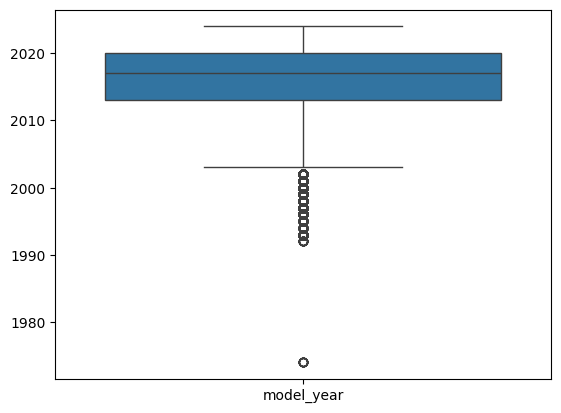

In [43]:
sns.boxplot(df[['model_year']])

<Axes: >

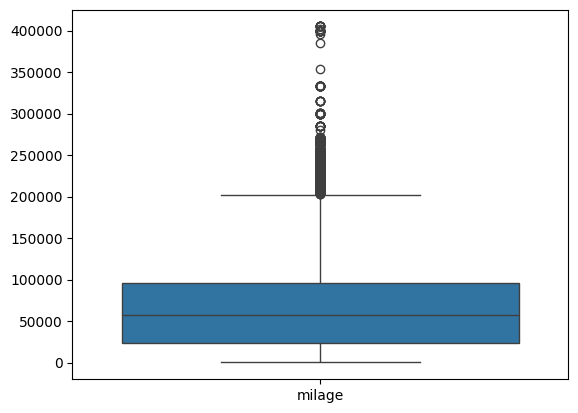

In [44]:
sns.boxplot(df[['milage']])

In [45]:
df.loc[df.milage >= 200000].model.value_counts()

model
Land Cruiser Base      72
F-150 XLT              47
GX 470 Base            45
F-150 XLT SuperCab     42
Dakota SLT Quad Cab    42
                       ..
LS 500 Base             1
Tacoma Base             1
Enclave Avenir          1
Crosstrek Premium       1
Rover Discovery SE      1
Name: count, Length: 515, dtype: int64

<Axes: >

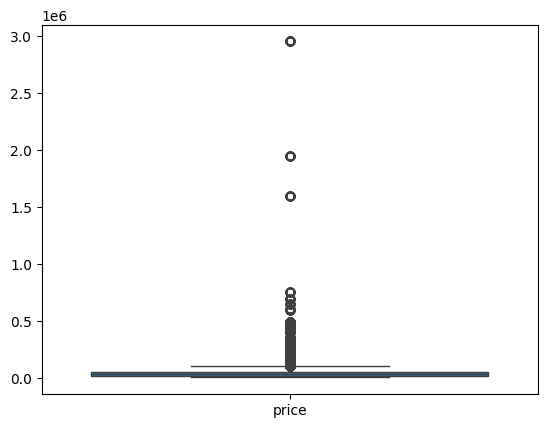

In [46]:
sns.boxplot(df[['price']])

In [47]:
more_prices = df.loc[df.price >= 1000000].model.value_counts().reset_index()
more_prices

,model,count
0,911 GT3,6
1,911 Turbo Cabriolet,6
2,1500 Laramie,4
3,Corvette Base,4
4,Continental GT Speed,3
...,...,...
102,Escalade ESV Platinum,1
103,DeVille Base,1
104,Rover LR4 Lux,1
105,F-250 King Ranch,1


In [48]:
prices = df.loc[df.price < 1000000].model.value_counts().reset_index()
prices

,model,count
0,F-150 XLT,2944
1,M3 Base,2228
2,Camaro 2SS,1709
3,M4 Base,1620
4,Mustang GT Premium,1526
...,...,...
1892,X3 xDrive35i,2
1893,X5 xDrive40e,1
1894,X5 3.0i,1
1895,XLR Base,1


In [49]:
more_prices.merge(prices, on='model')

,model,count_x,count_y
0,911 GT3,6,390
1,911 Turbo Cabriolet,6,130
2,1500 Laramie,4,1245
3,Corvette Base,4,1180
4,Continental GT Speed,3,76
...,...,...,...
102,Escalade ESV Platinum,1,555
103,DeVille Base,1,37
104,Rover LR4 Lux,1,14
105,F-250 King Ranch,1,215


In [50]:
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [51]:
engine_milage = df.groupby(['engine']).milage.mean().reset_index().sort_values('milage', ascending=False).reset_index(drop=True)
engine_milage

,engine,milage
0,250.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,182250.000000
1,3.8L V6 12V MPFI OHV,174966.500000
2,250.0HP 7.3L 8 Cylinder Engine Diesel Fuel,174885.452830
3,260.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,174314.076923
4,180.0HP 6.5L 8 Cylinder Engine Diesel Fuel,171911.800000
...,...,...
1112,591.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,11155.916667
1113,788.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,10592.285714
1114,6.8L V12 48V GDI DOHC,9902.166667
1115,Dual AC Electric Motors,9621.133333


In [52]:
milages = engine_milage.merge(df.groupby(['engine']).id.count().reset_index(), on='engine').merge(engine_brands, on='engine')

milages['brand_counts'] = milages.brand.apply(lambda x: len(x))
milages.rename(columns={'id': 'count', 'milage': 'mean_milage'}, inplace=True)
milages

,engine,mean_milage,count,brand,brand_counts
0,250.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,182250.000000,8,"[Audi, Pontiac]",2
1,3.8L V6 12V MPFI OHV,174966.500000,2,"[Dodge, Ford]",2
2,250.0HP 7.3L 8 Cylinder Engine Diesel Fuel,174885.452830,53,"[Ford, Chevrolet, Dodge, BMW, RAM]",5
3,260.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,174314.076923,26,[Ford],1
4,180.0HP 6.5L 8 Cylinder Engine Diesel Fuel,171911.800000,5,"[Chevrolet, BMW]",2
...,...,...,...,...,...
1112,591.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,11155.916667,48,"[Audi, Land, Porsche, McLaren, Mercedes-Benz]",5
1113,788.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,10592.285714,21,"[Ferrari, Audi, Dodge, Rivian, Mercedes-Benz, ...",8
1114,6.8L V12 48V GDI DOHC,9902.166667,18,"[Rolls-Royce, Porsche, Bentley, Ferrari]",4
1115,Dual AC Electric Motors,9621.133333,15,"[Porsche, Mercedes-Benz, BMW, Lucid]",4


In [53]:
milages[:25]

,engine,mean_milage,count,brand,brand_counts
0,250.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,182250.000000,8,"[Audi, Pontiac]",2
1,3.8L V6 12V MPFI OHV,174966.500000,2,"[Dodge, Ford]",2
2,250.0HP 7.3L 8 Cylinder Engine Diesel Fuel,174885.452830,53,"[Ford, Chevrolet, Dodge, BMW, RAM]",5
3,260.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,174314.076923,26,[Ford],1
4,180.0HP 6.5L 8 Cylinder Engine Diesel Fuel,171911.800000,5,"[Chevrolet, BMW]",2
5,245.0HP 5.9L Straight 6 Cylinder Engine Diesel...,171264.700000,30,"[Dodge, Chrysler]",2
6,245.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,169551.027778,36,"[Lexus, Toyota, BMW]",3
7,222.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,162146.928571,14,"[Nissan, Toyota, Ford, Chrysler, Volkswagen]",5
8,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,158293.818182,11,"[BMW, Toyota]",2
9,70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel,156875.000000,1,[smart],1


<Axes: >

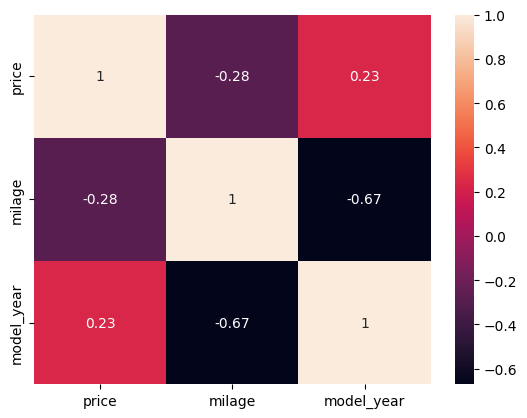

In [54]:
sns.heatmap(df[['price', 'milage', 'model_year']].corr(), annot=True)

Text(0.5, 1.0, 'Mean model price v/s Year')

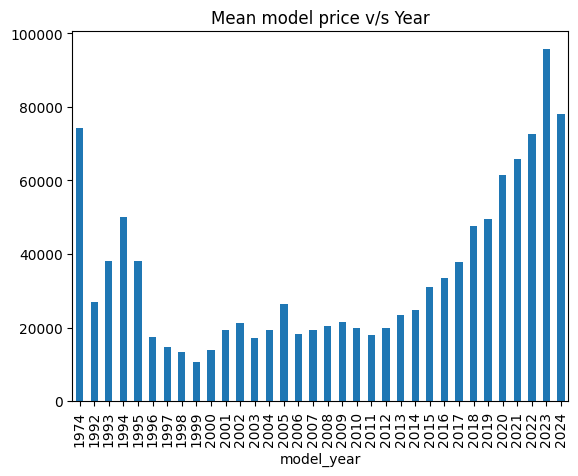

In [55]:
df.groupby(['model_year']).price.mean().plot(kind='bar')
plt.title("Mean model price v/s Year")

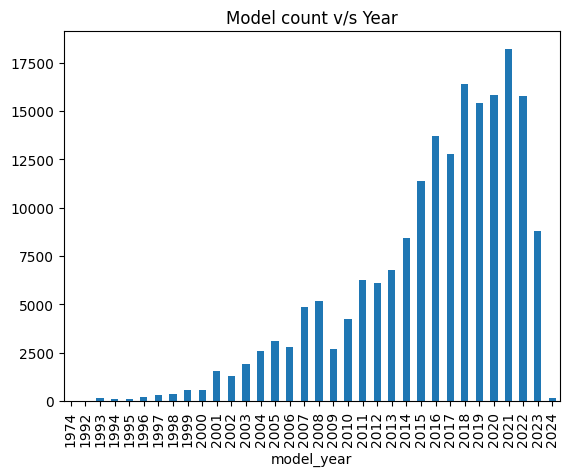

In [56]:
df.groupby(['model_year']).model.count().plot(kind='bar')
plt.title("Model count v/s Year");

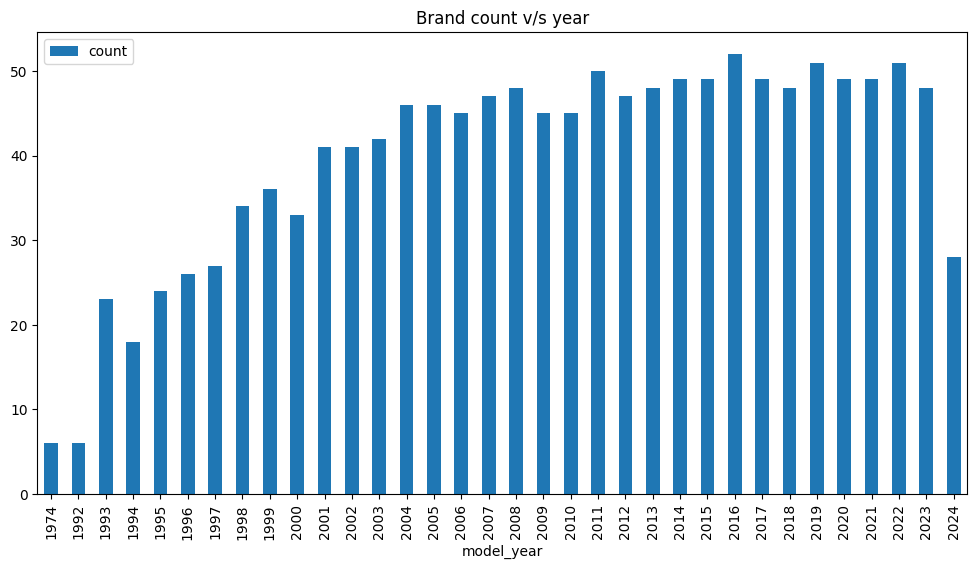

In [57]:
brand_counts = df.groupby(['model_year']).brand.unique().reset_index()
brand_counts['count'] = brand_counts.brand.apply(lambda x: len(x))
brand_counts[['model_year', 'count']].set_index('model_year').plot(kind='bar', figsize=(12, 6))
plt.title("Brand count v/s year");

## Max yearly sales count

In [58]:
max_sell_yearly = df.groupby(['model_year', 'brand']).id.count().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'id')).reset_index(drop=True)
# max_sell_yearly.drop(columns=['model', 'id'], inplace=True)
# max_sell_yearly.set_index('model_year').plot(kind='bar')
max_sell_yearly

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\3855203367.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_sell_yearly = df.groupby(['model_year', 'brand']).id.count().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'id')).reset_index(drop=True)


,model_year,brand,id
0,1974,Ford,7
1,1992,Mazda,6
2,1993,Toyota,19
3,1994,Cadillac,21
4,1995,Porsche,18
5,1996,Chevrolet,71
6,1997,Chevrolet,51
7,1998,Chevrolet,97
8,1999,Toyota,86
9,2000,Toyota,116


## Max sales yearly

In [59]:
sum_sales_yearly = df.groupby(['model_year', 'brand']).price.sum().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)
# max_sell_yearly.drop(columns=['model', 'id'], inplace=True)
# max_sell_yearly.set_index('model_year').plot(kind='bar')
sum_sales_yearly

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\849908259.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_sales_yearly = df.groupby(['model_year', 'brand']).price.sum().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)


,model_year,brand,price
0,1974,Ford,507093
1,1992,Pontiac,94000
2,1993,Porsche,705098
3,1994,Cadillac,3273422
4,1995,Porsche,2489981
5,1996,Chevrolet,1342486
6,1997,Chevrolet,1681012
7,1998,Chevrolet,1625977
8,1999,Chevrolet,1246355
9,2000,Chevrolet,1393939


## Which model of each brand sells the most and gives maximum revenue

In [60]:
df.groupby(['brand', 'model']).price.max().reset_index().groupby(['brand']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\1288016049.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['brand', 'model']).price.max().reset_index().groupby(['brand']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)


,brand,model,price
0,Acura,MDX w/Advance Package,489995
1,Alfa,Romeo Giulia Ti,649999
2,Aston,Martin DB7 Vantage Volante,2954083
3,Audi,S4 Base,2954083
4,BMW,M3 Base,1950995
5,Bentley,Continental GT V8,2954083
6,Bugatti,Veyron 16.4 Grand Sport,259500
7,Buick,Envision Essence,449991
8,Cadillac,DeVille Base,2954083
9,Chevrolet,Corvette Base,2954083


In [61]:
year_models = df.groupby(['model_year', 'brand', 'model']).price.max().reset_index().groupby(['model_year', 'brand']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)
year_models

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\2092622986.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year_models = df.groupby(['model_year', 'brand', 'model']).price.max().reset_index().groupby(['model_year', 'brand']).apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)


,model_year,brand,model,price
0,1974,Dodge,Challenger R/T Scat Pack,29900
1,1974,Ford,Bronco,197499
2,1974,Jaguar,F-PACE S,115998
3,1974,Lamborghini,Murcielago Base,197499
4,1974,Lincoln,Town Car Base,9999
...,...,...,...,...
1342,2024,Rivian,R1S Adventure Package,95000
1343,2024,Tesla,Model X Performance,84997
1344,2024,Toyota,Supra A91-MT Edition,84000
1345,2024,Volkswagen,CX-90 Premium,33950


## Maximum selling vehicle for each brand yearly

In [62]:
year_models.pivot(index='model_year', columns='brand', values='model').tail(10)

brand,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
model_year,,,,,,,,,,,,,,,,,,,,,
2015,RL Technology,Romeo Giulia Base,Martin Vantage GT Base,Q8 3.0T Prestige,M6 Base,Bentayga Onyx Edition,NaN,Enclave Leather,Escalade ESV Platinum,Corvette Z06,...,9-3 Aero,Sky Red Line,XTS Luxury,Impreza WRX Premium,SX4 Base,Model S Performance,Land Cruiser Base,Golf R 4-Door w/DCC & Navigation,S60 R,NaN
2016,RDX,Romeo Giulia Base,Martin Vantage Base,RS 7 4.0T quattro,M5 Base,Continental GT GT Speed,NaN,Enclave Leather,CTS-V Base,Corvette Z06,...,9-3 Aero,Sky Red Line,tC Anniversary Edition,WRX Base,NaN,Model X Long Range,Land Cruiser Base,Jetta GLI,S60 R,NaN
2017,TLX PMC Edition,Romeo Stelvio Ti Sport,Martin Vantage GT Base,RS 7 4.0T Performance Prestige,M550 i xDrive,Continental GT W12,NaN,Enclave 1XL,Escalade Luxury,Silverado 1500 LTZ,...,9-3 Aero,Sky Red Line,FR-S Monogram,Impreza 2.0i Sport,NaN,Model S 100D,Sequoia Limited,Touareg V6 Executive,S60 T6 Momentum,NaN
2018,MDX 3.5L w/Technology Package,Romeo Giulia Base,Martin DBS Superleggera,RS 7 4.0T Performance Prestige,M3 CS,Bentayga Onyx Edition,NaN,LaCrosse Base,Escalade ESV Luxury,Tahoe LT,...,NaN,Sky Red Line,NaN,Outback 2.5i Limited,NaN,Model X Long Range,Highlander XLE,Golf GTI 2.0T SE 4-Door,XC70 T6 Platinum,NaN
2019,MDX 3.5L w/Advance & Entertainment Pkgs,Romeo Giulia Quadrifoglio,Martin DBS Superleggera,R8 5.2 V10 performance,M4 Base,Bentayga V8,NaN,Enclave Avenir,CTS 3.6L Luxury,Corvette Stingray w/3LT,...,9-3 Aero,Sky Red Line,FR-S Monogram,Ascent Touring 7-Passenger,Juke SL,Model X Long Range Plus,4Runner TRD Pro,Beetle 2.0T Final Edition SE,XC60 T6 Inscription,NaN
2020,RDX PMC Edition,Romeo Giulia Ti,Martin DBX Base,Q8 55 Premium Plus,M4 Base,Bentayga Speed,NaN,Enclave Avenir,Escalade Premium Luxury,Corvette Z06,...,9-3 Aero,NaN,NaN,Impreza 2.0i Premium,NaN,Model X Long Range Plus,Land Cruiser Base,Atlas Cross Sport 3.6L V6 SEL Premium,XC90 Recharge Plug-In Hybrid T8 Inscription 7 ...,NaN
2021,MDX w/Advance Package,Romeo Giulia Quadrifoglio,Martin DBX Base,A8 L 55,M3 Base,Continental GT V8,NaN,Envision Essence,Escalade Premium Luxury Platinum,Corvette Stingray w/3LT,...,NaN,Sky Red Line,NaN,Outback Touring XT,NaN,Model 3 Long Range,Tundra SR5,Wagoneer Series III,XC60 Recharge Plug-In Hybrid T8 Inscription,NaN
2022,RDX w/Advance Package,Romeo Giulia Quadrifoglio,Martin DBX Base,A6 55 Premium Plus,M8 Gran Coupe Competition,Continental GT Speed,NaN,Envision Essence,Escalade Sport Platinum,Silverado 1500 Custom Trail Boss,...,9-3 Aero,Sky Red Line,FR-S Monogram,WRX Limited,NaN,Model Y Long Range,Highlander XLE,Q5 S line Premium Plus,S90 T5 Momentum,NaN
2023,MDX w/Technology Package,Romeo Giulia Ti,Martin DBX Base,RS 7 4.0T,M4 Competition xDrive,Bentayga Onyx Edition,Veyron 16.4 Grand Sport,Enclave Leather,Escalade ESV Luxury,Corvette Stingray w/3LT,...,NaN,Sky Red Line,NaN,Outback Limited XT,NaN,Model X Performance,Sequoia Platinum,Passat 2.0T R-Line,XC40 T5 Momentum,Nautilus Reserve


In [63]:
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


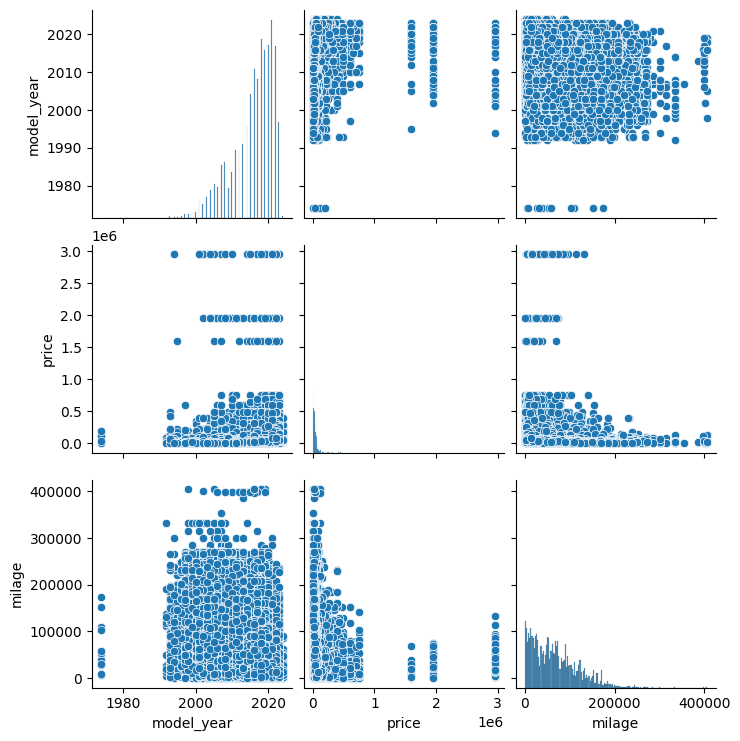

In [64]:
sns.pairplot(df[['model_year', 'price', 'milage']])

## Milage kde plots

<Axes: xlabel='milage', ylabel='Density'>

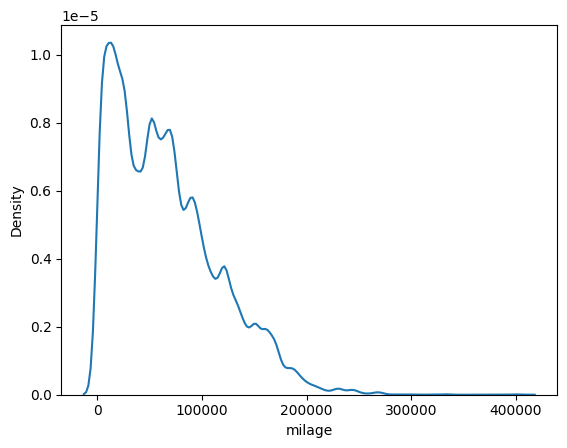

In [65]:
sns.kdeplot(df.milage)

<Axes: xlabel='milage', ylabel='Density'>

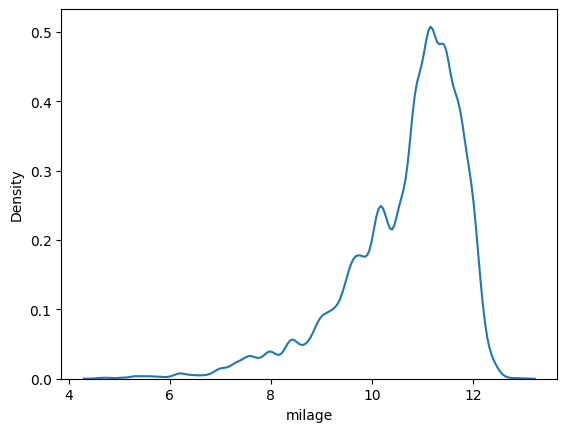

In [66]:
# Log transform on milage

sns.kdeplot(np.log(df.milage))

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_1964\728347378.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(scipy.stats.boxcox(df.milage))


<Axes: ylabel='Density'>

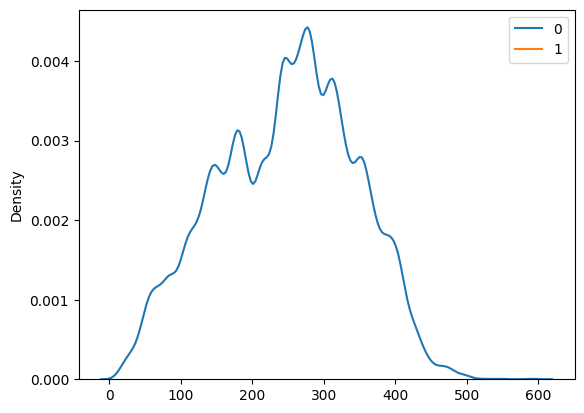

In [67]:
import scipy
import scipy.stats
sns.kdeplot(scipy.stats.boxcox(df.milage))

## Prices kde

<Axes: xlabel='price', ylabel='Density'>

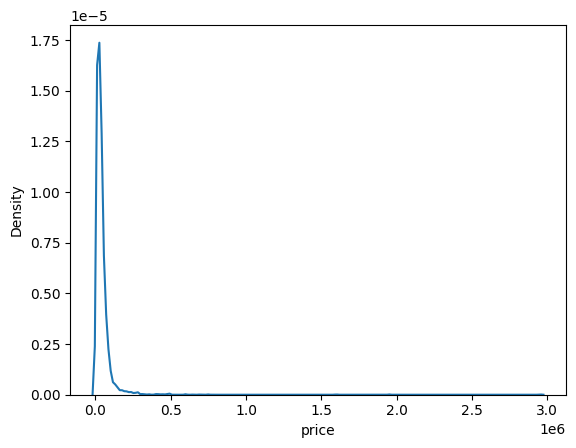

In [68]:
sns.kdeplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

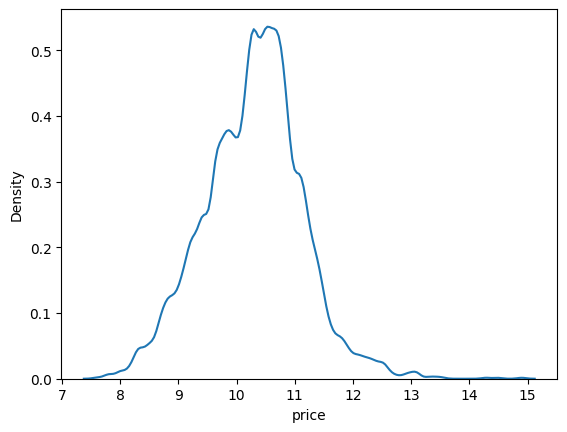

In [69]:
sns.kdeplot(np.log(df.price))

**Converted to normal distribution**

In [70]:
df.loc[df.price == df.price.min()].shape, df.price.min()

((56, 13), np.int64(2000))

In [71]:
df.loc[df.price == df.price.max()].shape, df.price.max()

((50, 13), np.int64(2954083))

In [72]:
df.milage.min(), df.loc[df.milage == df.milage.min()].shape

(np.int64(100), (20, 13))

In [73]:
df.milage.max(), df.loc[df.milage == df.milage.max()].shape

(np.int64(405000), (8, 13))

In [74]:
df.loc[df.milage == df.milage.max()]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
24014,24014,Ford,F-150 XLT,2018,405000,E85 Flex Fuel,385.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,35000
36080,36080,Chevrolet,Camaro 1SS,2019,405000,Gasoline,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Orange,Black,None reported,Yes,71950
45077,45077,Toyota,Tacoma TRD Sport,2018,405000,Gasoline,278.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes,30000
45288,45288,Toyota,Tacoma TRD Sport,2018,405000,Gasoline,278.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,20995
61730,61730,Porsche,911 Carrera Cabriolet,1998,405000,Gasoline,300.0HP 3.4L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,124995
126917,126917,Volvo,S40 T5,2005,405000,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gold,Beige,None reported,Yes,10500
137357,137357,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,405000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,18000
161337,161337,Volkswagen,CC 2.0T Sport,2016,405000,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,17500


In [75]:
df.loc[(df.brand == 'Volkswagen') & (df.model_year == 2016) & (df.model == 'Golf GTI 2.0T SE 4-Door') & (df.engine == '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel')]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
23276,23276,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,120000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,3600
74926,74926,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,87501,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,9-Speed A/T,White,Black,None reported,Yes,15500
91926,91926,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,92203,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,16000
137357,137357,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,405000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,18000


In [76]:
df.loc[(df.brand == 'Volvo') & (df.model_year == 2005) & (df.model == 'S40 T5') & (df.engine == '218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel')]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
18228,18228,Volvo,S40 T5,2005,71000,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,5-Speed A/T,White,Beige,None reported,Yes,12499
66788,66788,Volvo,S40 T5,2005,257700,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,29900
78918,78918,Volvo,S40 T5,2005,98300,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Gray,None reported,Yes,6250
81915,81915,Volvo,S40 T5,2005,2100,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Black,None reported,Yes,55600
87111,87111,Volvo,S40 T5,2005,257700,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Green,Beige,None reported,Yes,7300
97499,97499,Volvo,S40 T5,2005,220000,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,None reported,Yes,6250
97655,97655,Volvo,S40 T5,2005,99897,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Yellow,Black,None reported,Yes,12900
126917,126917,Volvo,S40 T5,2005,405000,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gold,Beige,None reported,Yes,10500


In [77]:
df.loc[df.milage > 400000].shape, df.loc[df.milage > 300000].shape, df.loc[df.milage > 250000].shape, df.loc[df.milage > 100000].shape, df.shape

((9, 13), (63, 13), (315, 13), (42461, 13), (188533, 13))

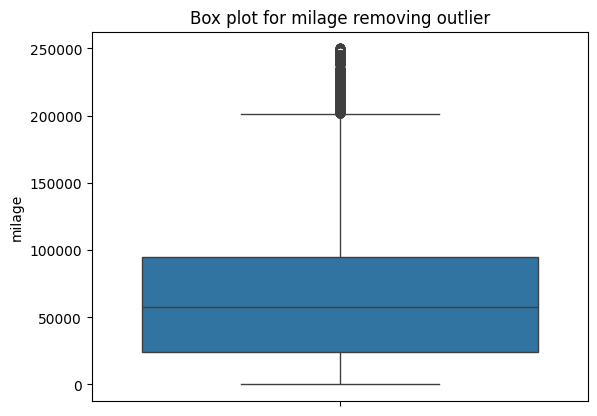

In [78]:
sns.boxplot(df.loc[df.milage <= 250000].milage)
plt.title("Box plot for milage removing outlier")
plt.show()

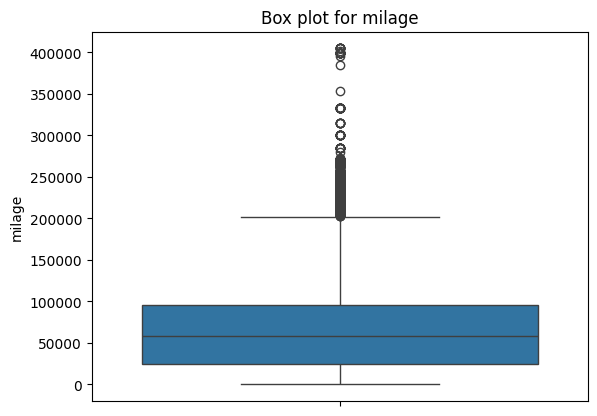

In [79]:
sns.boxplot(df.milage)
plt.title("Box plot for milage")
plt.show()

Clearly these are outliers

In [80]:
df.price.max()

np.int64(2954083)

In [81]:
df.loc[df.price > 2000000].shape, df.loc[df.price > 2500000].shape, df.loc[df.price > 1000000].shape, df.loc[df.price > 1500000].shape

((50, 13), (50, 13), (148, 13), (148, 13))

In [82]:
df.loc[df.price == df.price.max()].sample(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
46159,46159,Chevrolet,Tahoe LT,2018,83858,E85 Flex Fuel,5.3L V8 16V MPFI OHV Flexible Fuel,6-Speed Automatic,Silver,Jet Black,None reported,NaN,2954083
66224,66224,Chevrolet,Corvette Base,2005,23133,Gasoline,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gold,Beige,None reported,Yes,2954083
172766,172766,Lexus,SC 430 Base,2004,89500,Gasoline,300.0HP 4.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,2954083


In [83]:
df.loc[df.price > 1000000].price.value_counts()

price
1599000    51
2954083    50
1950995    47
Name: count, dtype: int64

In [84]:
df.loc[df.price > 500000].price.value_counts()

price
1599000    51
2954083    50
749950     48
1950995    47
695000     45
599995     41
599000     36
649999     34
Name: count, dtype: int64

In [85]:
df.loc[df.price > 450000].price.value_counts()

price
489000     59
469900     57
1599000    51
2954083    50
749950     48
1950995    47
479995     46
695000     45
488880     44
599995     41
489995     40
491836     40
599000     36
649999     34
Name: count, dtype: int64

Considering 500000 and greater as outliers

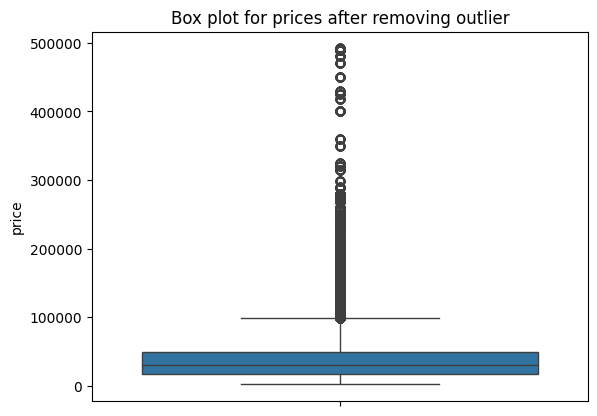

In [86]:
sns.boxplot(df.loc[df.price < 500000].price)
plt.title("Box plot for prices after removing outlier")
plt.show()

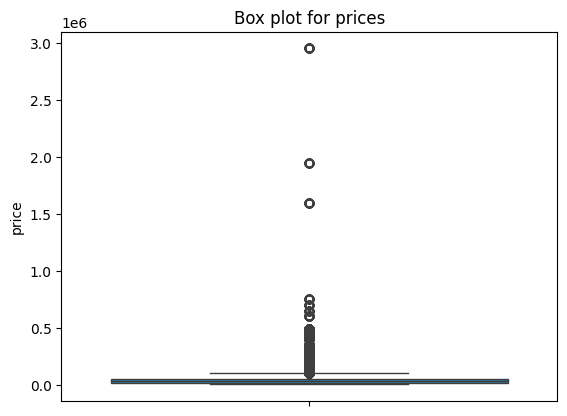

In [87]:
sns.boxplot(df.price)
plt.title("Box plot for prices")
plt.show()

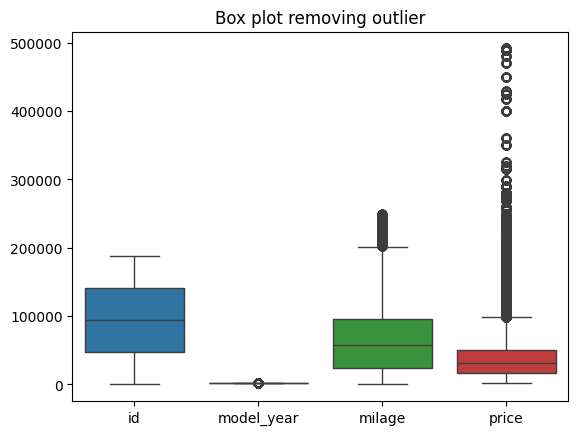

In [88]:
sns.boxplot(df.loc[(df.price < 500000) & (df.milage < 250000)])
plt.title("Box plot removing outlier")
plt.show()

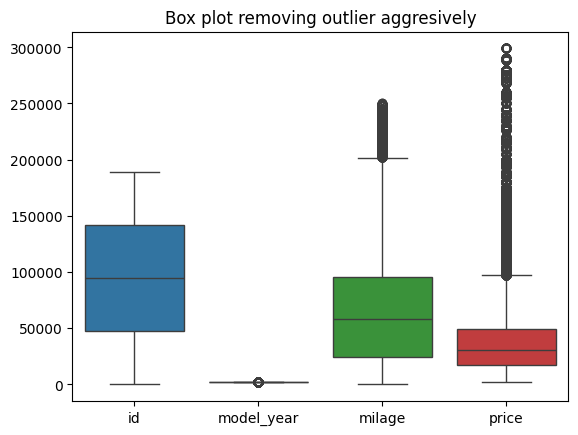

In [89]:
sns.boxplot(df.loc[(df.price < 300000) & (df.milage < 250000)])
plt.title("Box plot removing outlier aggresively")
plt.show()

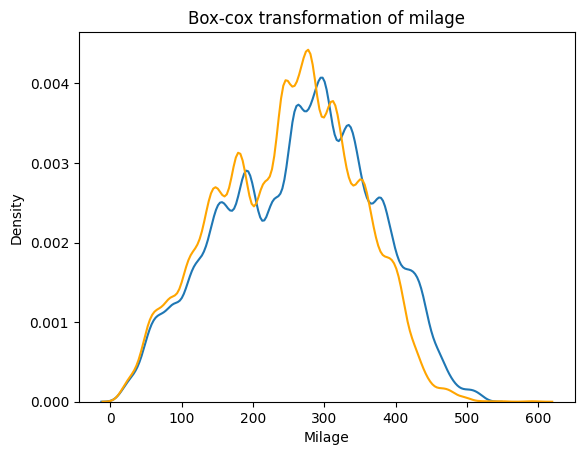

In [90]:
sns.kdeplot(scipy.stats.boxcox(df.loc[df.milage < 250000].milage)[0])
sns.kdeplot(scipy.stats.boxcox(df.milage)[0], color='orange')
plt.title("Box-cox transformation of milage")
plt.xlabel("Milage")
plt.show()

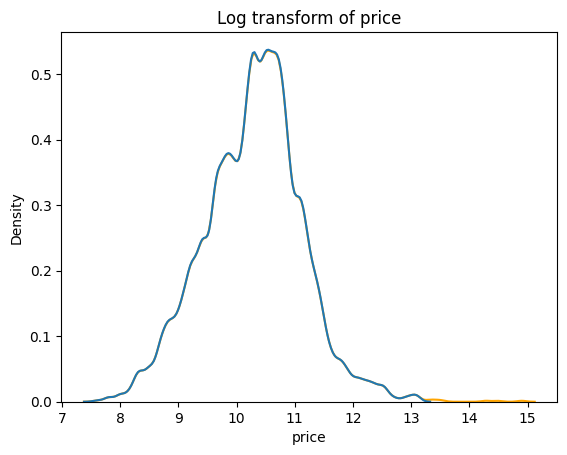

In [91]:
sns.kdeplot(np.log(df.price), color='orange')
sns.kdeplot(np.log(df.loc[df.price < 500000].price))
plt.title("Log transform of price")
plt.show()